In [53]:
import os
import torch
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

# Train

In [64]:
with open('/ssd/a.sergeeva/BAGS/train_new.txt', 'r') as f:
    train = f.read()
with open('/ssd/a.sergeeva/BAGS/val_new.txt', 'r') as f:
    val = f.read()

train_cache = torch.load('/ssd/a.sergeeva/BAGS/train_new.cache')
val_cache = torch.load('/ssd/a.sergeeva/BAGS/val_new.cache')
    

In [19]:
train_lst = sorted(train.split('\n'))
val_lst = sorted(val.split('\n'))
print(f'Train size: {len(train_lst)}, Val size: {len(val_lst)}')

Train size: 2566, Val size: 410


In [14]:
set(train_lst) & set(val_lst)

{''}

In [25]:
sorted(os.listdir('/stor/data/human/RESDATAANN-601/video/RESDATAANN-607/cam01'))

['cam01_cut_hiv00000.mp4.json',
 'cam01_cut_hiv00001.mp4.json',
 'cam01_cut_hiv00002.mp4.json',
 'cut_hiv00000.mp4',
 'cut_hiv00001.mp4',
 'cut_hiv00002.mp4']

# Test

In [84]:
def read_json(path):
    with open(path, 'r') as f:
        data = json.load(f)
    return data

def get_frame_bbox(regions):
    bboxes, labels = [], []
    if len(regions) != 0:        
        for row in regions:
            row_attr = row['shape_attributes']
            bbox = [row_attr['x'], row_attr['y'], row_attr['width'], row_attr['height']]
            bboxes.append(bbox)
            label = row['region_attributes']['Статус человека']
            labels.append(label)
    return np.array(bboxes), labels
        
def transform_bbox_for_yolo(bboxes, w, h):
    bboxes_new = np.zeros((bboxes.shape[0], 5))
    bboxes_new[:, 1:2] = (bboxes[:, 0:1] + bboxes[:, 2:3]) / 2 / w
    bboxes_new[:, 2:3] = (bboxes[:, 1:2] + bboxes[:, 3:4]) / 2 / h

    bboxes_new[:, 3:4] = (bboxes[:, 2:3] - bboxes[:, 0:1]) / w
    bboxes_new[:, 4:5] = (bboxes[:, 3:4] + bboxes[:, 1:2]) / h
    return bboxes_new

In [85]:
root = '/stor/data/human/RESDATAANN-601/video/RESDATAANN-607/cam01/'
sorted(os.listdir(root))

['cam01_cut_hiv00000.mp4.json',
 'cam01_cut_hiv00001.mp4.json',
 'cam01_cut_hiv00002.mp4.json',
 'cut_hiv00000.mp4',
 'cut_hiv00001.mp4',
 'cut_hiv00002.mp4']

In [86]:
data_00 = read_json(root + 'cam01_cut_hiv00000.mp4.json')

In [87]:
data_00_new = {}
for key, value in data_00.items():
    key_split = key.split('.jpeg')[0]
    key_split = key_split.split('.mp4_')
    key_new = key_split[0] + '.mp4_' + str(int(key_split[1])) + '.jpeg'
    data_00_new[key_new] = value

In [88]:
data_00_new

{'cam01_cut_hiv00000.mp4_0.jpeg': {'filename': 'cam01_cut_hiv00000.mp4_000000000.jpeg',
  'size': 219520,
  'regions': [],
  'file_attributes': {}},
 'cam01_cut_hiv00000.mp4_1.jpeg': {'filename': 'cam01_cut_hiv00000.mp4_000000001.jpeg',
  'size': 430341,
  'regions': [{'shape_attributes': {'name': 'rect',
     'x': 964,
     'y': 82,
     'width': 37,
     'height': 29},
    'region_attributes': {'Статус человека': 'Оставил'}},
   {'shape_attributes': {'name': 'rect',
     'x': 959,
     'y': 49,
     'width': 84,
     'height': 73},
    'region_attributes': {'Статус человека': 'Оставил'}}],
  'file_attributes': {}},
 'cam01_cut_hiv00000.mp4_2.jpeg': {'filename': 'cam01_cut_hiv00000.mp4_000000002.jpeg',
  'size': 429974,
  'regions': [],
  'file_attributes': {}},
 'cam01_cut_hiv00000.mp4_3.jpeg': {'filename': 'cam01_cut_hiv00000.mp4_000000003.jpeg',
  'size': 430023,
  'regions': [],
  'file_attributes': {}},
 'cam01_cut_hiv00000.mp4_4.jpeg': {'filename': 'cam01_cut_hiv00000.mp4_000000


--- Video info ---
 fps: 15.0 
 frame width: 1280.0 
 frame_heights: 720.0 
 num frames: 752.0 
 ------------------
[] []
[]
cam01_cut_hiv00000.mp4_000000.jpeg


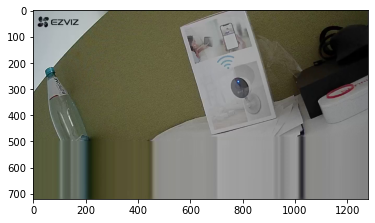

[[964  82  37  29]
 [959  49  84  73]] ['Оставил', 'Оставил']
[[ 0.          0.39101562  0.07708333 -0.72421875  0.15416667]
 [ 0.          0.40742187  0.08472222 -0.68359375  0.16944444]]
cam01_cut_hiv00000.mp4_000001.jpeg


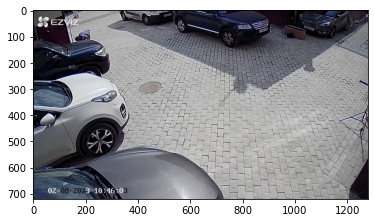

[] []
[]
cam01_cut_hiv00000.mp4_000002.jpeg


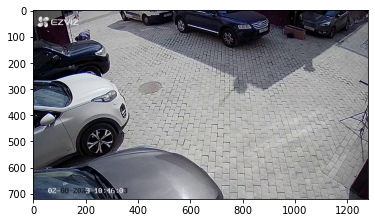

[] []
[]
cam01_cut_hiv00000.mp4_000003.jpeg


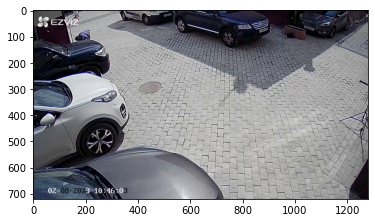

[] []
[]
cam01_cut_hiv00000.mp4_000004.jpeg


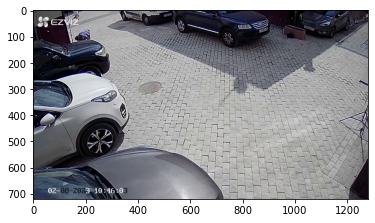

[] []
[]
cam01_cut_hiv00000.mp4_000005.jpeg


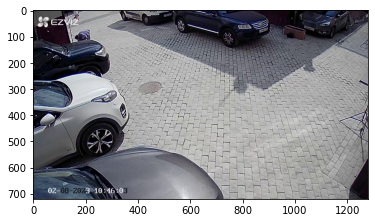

[] []
[]
cam01_cut_hiv00000.mp4_000006.jpeg


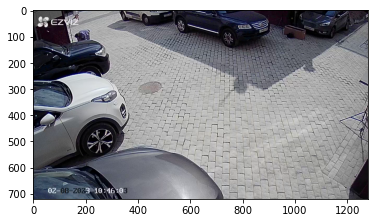

[] []
[]
cam01_cut_hiv00000.mp4_000007.jpeg


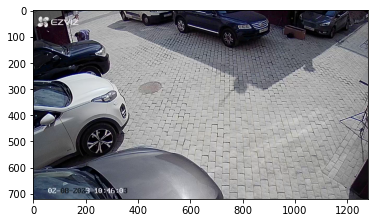

[] []
[]
cam01_cut_hiv00000.mp4_000008.jpeg


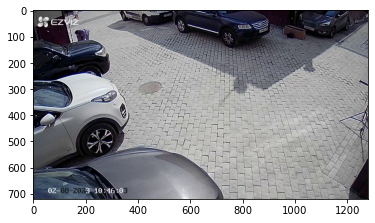

[] []
[]
cam01_cut_hiv00000.mp4_000009.jpeg


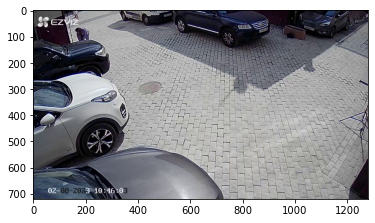

[] []
[]
cam01_cut_hiv00000.mp4_000010.jpeg


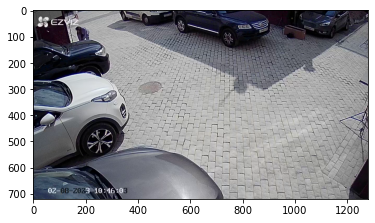

In [75]:
vname = 'cut_hiv00000.mp4'
cap = cv2.VideoCapture(root + vname)
fps = cap.get(cv2.CAP_PROP_FPS)
frame_w = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_h = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
num_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(f'\n--- Video info ---\n fps: {fps} \n frame width: {frame_w} \n frame_heights: {frame_h} \n num frames: {num_frames} \n ------------------')

i_frame = 0
cache = {}
while(True):
  ret, frame = cap.read() 
  if ret == True:      
     frame_info = data_00_new[f'cam01_{vname}_{i_frame}.jpeg']
     regions = frame_info['regions']
     bboxes, label = get_frame_bbox(regions)
     if len(bboxes) != 0:
      bboxes_new = transform_bbox_for_yolo(bboxes, frame_w, frame_h)
     else:
       bboxes_new = bboxes
     print(bboxes, label)
     print(bboxes_new)
     img_save_path = f'cam01_{vname}_{i_frame:06}.jpeg'
     cache[img_save_path] = [bboxes_new, (frame_w, frame_h), []]
     print(img_save_path)
     frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
     #cv2.imwrite(img_save_path, frame)
     
     plt.imshow(frame)
     plt.show()
     if i_frame == 10:
        break
     i_frame += 1
  

In [77]:
fps

5